# LN 2 - Veränderung der Armutsrate weltweit


**Inhaltsverzeichnis:**
1. Einleitung
2. Daten beschaffen und laden
3. Daten vorbereiten
4. Statistik der Rohdaten
5. Analyse der Daten

### 1. Einleitung

**Gruppe:**
- Elena Stevanovic, Karina von Felbert, Jeremiah Otter

**Fragestellung:**

- Auf welchem Kontinent oder Land hat sich die Armutsrate am meisten verändert? Was sind Gründe dafür?  

**Datenquellen:**

-  https://ourworldindata.org/grapher/share-of-population-in-extreme-poverty
2. Quelle mit Informationen Analyse einfügen!!!




### 2. Daten beschaffen und laden

In [1]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
# lade hier deine Daten
file_path = "share-of-population-in-extreme-poverty.csv"

df = pd.read_csv(file_path, skiprows=1,
                 names=['Gebiet','Code','Jahr','Anteil Population in Armut','Annotierung'])
df.head()  



,Gebiet,Code,Jahr,Anteil Population in Armut,Annotierung
0,Albania,ALB,1996,0.534846,NaN
1,Albania,ALB,2002,1.092647,NaN
2,Albania,ALB,2005,0.591086,NaN
3,Albania,ALB,2008,0.199925,NaN
4,Albania,ALB,2012,0.620691,NaN


## 3. Daten vorbereiten 
**- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert**

- Unser ursprünglicher Datensatz ist im Longformat. Die Daten sind also so strukturiert, dass jede Zeile für ein spezifisches Merkmal steht (z.B. Gebiet oder Jahr)

**- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?**

- Longformat: Datenanalyse, Filterung oder Gruppierung nach Variablen, Visualisierung
- Wideformat: Erzeugung von Übersichtstabellen, Vergleich mehrerer Variablen

**- Welche Datentypen kommen in meinem Datensatz vor?**

Basierend auf unserem Pivot:
- Gebiet, Code: String, da es Länder oder Regionen beschreibt
- Jahr: Integer, wird aber nach der Transformation zum Spaltennamen
- Anteil Population in Armut, Annotierung: Float, da es sich um kontinuierlich numerische Werte handelt


In [4]:
df.dtypes

Gebiet                         object
Code                           object
Jahr                            int64
Anteil Population in Armut    float64
Annotierung                   float64
dtype: object

## 4. Statistik der Rohdaten

**- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele  einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?**

- "Year" ist diskret, "Share of population in Poverty" ist kontinuierlich
- Die Spalte "Year" hat 61 Jahre
- Die Verteilung der Datenpunkte zeigt, dass die meisten Einträge aus dem Jahr 2018 stammen (91 Datenpunkte), gefolgt von 2015 (86 Datenpunkte)

**- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung) Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?**
**Wo fehlen Datenpunkte?**

- Der Datensatz enthält 2152 Datenpunkte
- Die Spalte "Annotationen" enthält ausschlieslich fehlende Werte, andere Spalten haben keine fehlenden Werte
- Die meisten Datenpunkte stammen aus dem Jahr 2018 (91 Einträge)
- Länder mit den meisten Datenpunkten sind: USA (60), Vereinigtes Königreich (54), Kanada (43)

**- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)**
- Zusammenhang zwischen "Year" und "Share of population in poverty"
- Es gibt einen leichten negativen Trend: In späteren Jahren (höhere Werte von "Year") scheint der Anteil der Bevölkerung in extremer Armut tendenziell zu sinken.
- Dieser Trend ist jedoch nicht stark ausgeprägt.

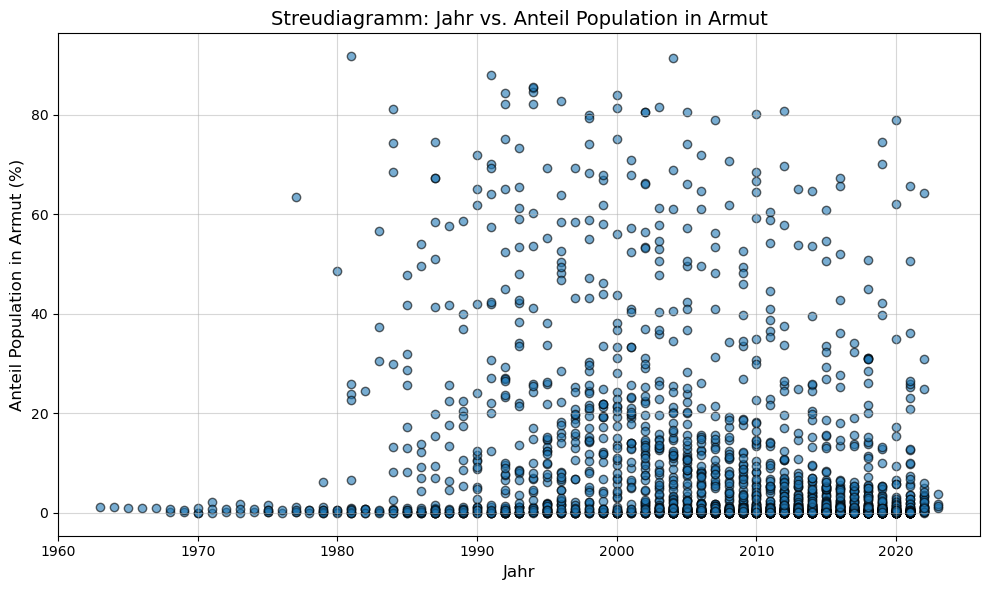

In [5]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Jahr'], df['Anteil Population in Armut'], alpha=0.6, edgecolor='k')
plt.title('Streudiagramm: Jahr vs. Anteil Population in Armut', fontsize=14)
plt.xlabel('Jahr', fontsize=12)
plt.ylabel('Anteil Population in Armut (%)', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


**- Wie ist die Verteilung der zu untersuchenden Variabeln**

-  Es gibt einige Ausreißer mit einem hohen Anteil an extremer Armut. Die Mehrheit der Werte konzentriert sich jedoch in einem engen Bereich

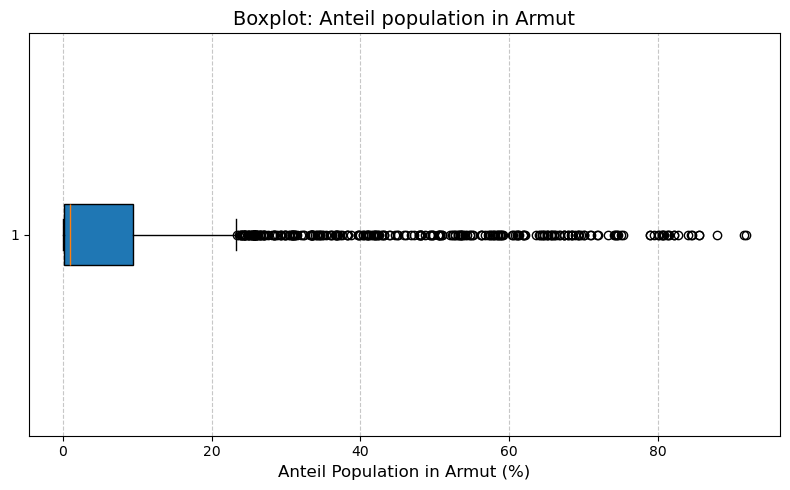

In [6]:
# Boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(df['Anteil Population in Armut'], vert=False, patch_artist=True)
plt.title('Boxplot: Anteil population in Armut', fontsize=14)
plt.xlabel('Anteil Population in Armut (%)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**4.1 Analyse der Gebiete**

In [7]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  169


In [8]:
df['Gebiet'].value_counts()

Gebiet
United States       60
United Kingdom      54
Canada              43
Brazil              38
Costa Rica          37
                    ..
Marshall Islands     1
Grenada              1
Qatar                1
Lebanon              1
Suriname             1
Name: count, Length: 169, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

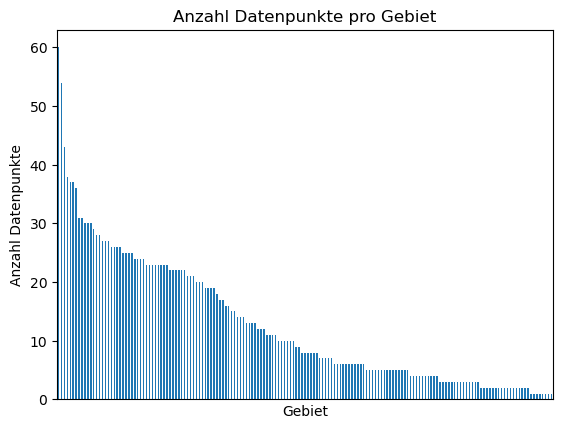

In [9]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

**4.2 Analyse der Codes**

In [10]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  169


In [11]:
df['Code'].value_counts()

Code
USA    60
GBR    54
CAN    43
BRA    38
CRI    37
       ..
MHL     1
GRD     1
QAT     1
LBN     1
SUR     1
Name: count, Length: 169, dtype: int64

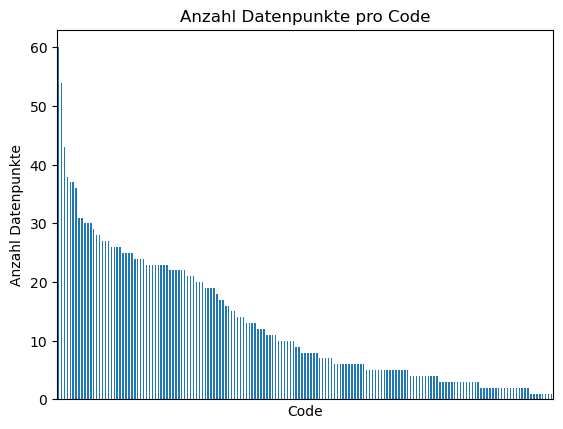

In [12]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

**4.3 Analyse der Jahre**

In [13]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  61


In [14]:
df['Jahr'].value_counts().sort_index()

Jahr
1963     1
1964     1
1965     1
1966     1
1967     1
        ..
2019    77
2020    65
2021    70
2022    27
2023     4
Name: count, Length: 61, dtype: int64

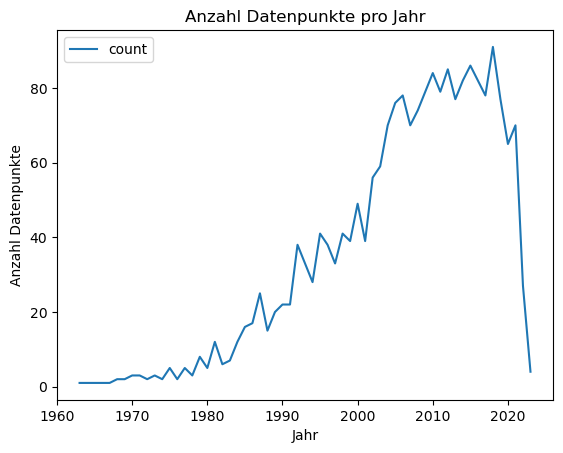

In [15]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.legend()

In [43]:
df_analyse = df[(df['Jahr'] >= 2010) & (df['Jahr'] <= 2020)].drop('Annotierung', axis=1)

# create a analyse_pivot 
df_pivot = df_analyse.pivot(index='Gebiet', columns='Jahr', values='Anteil Population in Armut')
df_pivot.head()

Jahr,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Gebiet,,,,,,,,,,,
Albania,NaN,NaN,0.620691,NaN,1.023101,0.096067,0.139303,0.392570,0.048107,0.00000,0.021277
Algeria,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.122005,NaN,NaN
Armenia,0.951465,1.185071,0.832222,1.738265,1.439143,1.146360,1.107947,0.785655,1.339821,1.03007,0.352011
Australia,0.349168,NaN,NaN,NaN,0.498484,NaN,0.498742,NaN,0.497094,NaN,NaN


**4.4 Analyse der Population in Armut**

In [40]:
df_analyse.describe()

,Jahr,Anteil Population in Armut
count,886.000000,886.000000
mean,2014.906321,5.353303
std,3.113888,12.578556
min,2010.000000,0.000000
25%,2012.000000,0.133848
50%,2015.000000,0.705753
75%,2018.000000,3.573017
max,2020.000000,80.730060


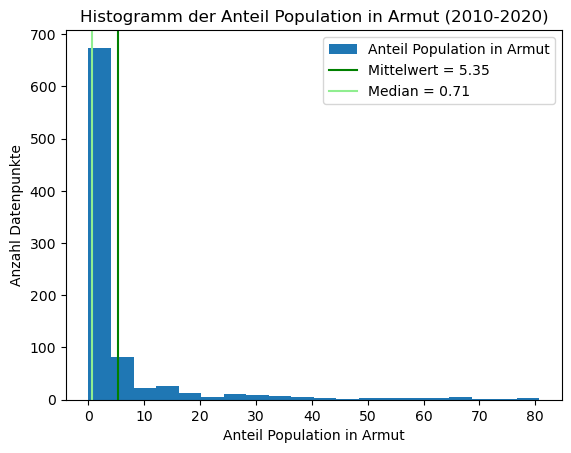

In [46]:
filtered_df = df[(df['Jahr'] >= 2010) & (df['Jahr'] <= 2020)]

g = filtered_df['Anteil Population in Armut'].plot(
    kind='hist', 
    bins=20, 
    title='Histogramm der Anteil Population in Armut (2010-2020)', 
    xlabel='Anteil Population in Armut', 
    ylabel='Anzahl Datenpunkte'
)

mean = filtered_df['Anteil Population in Armut'].mean()
median = filtered_df['Anteil Population in Armut'].median()

g.axvline(x=mean, color='green', label=f'Mittelwert = {mean:.2f}')  
g.axvline(x=median, color='lightgreen', label=f'Median = {median:.2f}') 

g.legend()

**Beobachtungen:**
- Die Rohdaten beeinhalten Länder, Code, Regionen, Kontinente, Jahre und Armut in Ländern in Prozent
- Die Spalten Gebiete enthält 169 Einträge
- Jedes Gebiet hat hat unterschiedliche Datenpunkte, es geht von 1 bis zu 60 Datenpunkte
- Die Spalte Code enthält 169 Einträge
- Die Gebiete haben unterschiedlich Datenpunkte erhoben, am meisten Daten wurden 2019 erhoben
- Daten sind zwischen 1963 bis 2023 erhoben worden
- Der Anteil an Armut in den Ländern streut zwischen .. und .. Prozent

## 5. Analyse

**5.1 Beobachtungen**

- Die Länder mit dem höchsten Armutsanteil sind: China, Dominikanische Republik, Guinea, Nigeria, Eswatini

- Die Länder mit dem geringsten Armutsanteil sind: Weissrussland, Azerbaijan, Österreich, Algerien, Albanien

- Die grösste Differenz des Armutanteils haben die Länder zwischen den Jahren: 
- Die kleinste Differenz des Armutanteils haben die Länder zwischen ...:

**5.2 Interpretation**



**5.3 Berechnung**

In [49]:
df_clean = df_pivot[[2010, 2020]]

diffs = df_clean[2020] - df_clean[2010]


In [58]:
diffs= df_pivot[2020]-df_pivot[2010]
diffs

Gebiet
Albania           NaN
Algeria           NaN
Angola            NaN
Armenia     -0.599455
Australia         NaN
               ...   
Vanuatu           NaN
Vietnam     -2.216704
Yemen             NaN
Zambia            NaN
Zimbabwe          NaN
Length: 158, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen des Anteils der Population in Armut 2010-2020'}, ylabel='Gebiet'>

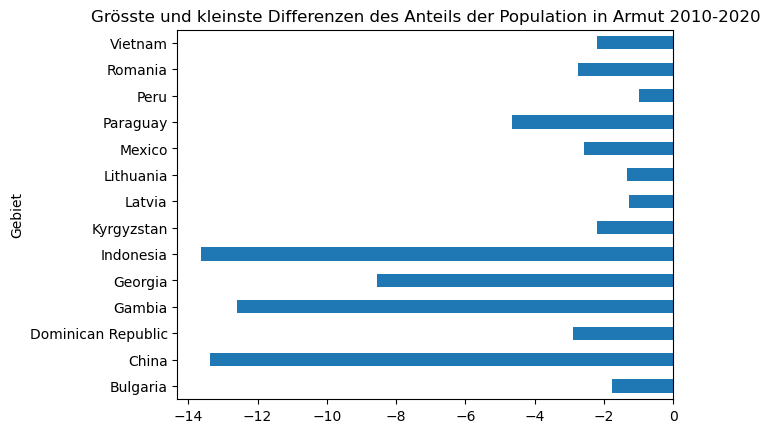

In [57]:
diff_sel = (diffs < -1) | (diffs > 5)  
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen des Anteils der Population in Armut 2010-2020')

In [53]:
Gebiets_liste = diffs[diff_sel].index.tolist() 
print(Gebiets_liste)

['China', 'Gambia', 'Georgia', 'Indonesia', 'Paraguay']


In [70]:
Gebiets_liste = diffs[diff_sel].index.tolist()

Gebiets_liste = [gebiet for gebiet in Gebiets_liste if gebiet != 'China']

print(Gebiets_liste)


['Bulgaria', 'Dominican Republic', 'Gambia', 'Georgia', 'Indonesia', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Mexico', 'Paraguay', 'Peru', 'Romania', 'Vietnam']


**4.4 Visualisierung**

dominik fröge was s'fucking problem isch ich check nöd

Text(2020.5, 37, 'Covid')

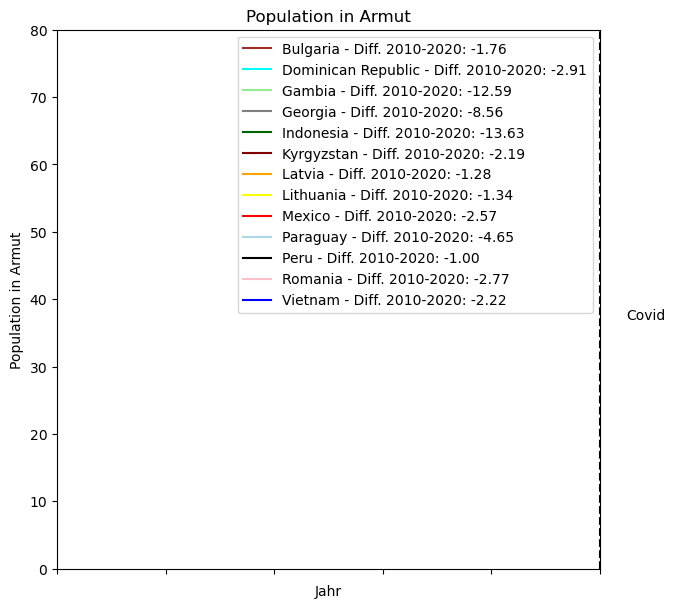

In [71]:
color_dict = {
    'Vietnam': 'blue',
    'Romania': 'pink',
    'Peru': 'black',
    'Mexico': 'red',
    'Lithuania': 'yellow',
    'Latvia': 'orange',
    'Kyrgyzstan': 'maroon',
    'Dominican Republic': 'cyan',
    'Bulgaria': 'brown',
    'Gambia': 'lightgreen',
    'Georgia': 'grey',
    'Paraguay': 'lightblue',
    'Indonesia': 'darkgreen',
    
    
}

for gebiet in Gebiets_liste:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title='Population in Armut', xlabel='Jahr', ylabel=f'Population in Armut', legend=True,
                                  label=f'{gebiet} - Diff. 2010-2020: {diff:.2f}', 
                                  xlim=[2010, 2020], ylim=[0, 80],   
                                  color=color_dict[gebiet],        
                                  figsize=(7,7))                  

# Covid Pandemie    
g.axvline(x=2020, color='black', linestyle='--') 
g.text(2020.5, 37, 'Covid')  

In [55]:
filtered_df = df[(df['Jahr'] >= 2010) & (df['Jahr'] <= 2020)]

top_5_countries = filtered_df.sort_values(by='Anteil Population in Armut', ascending=False).head(5)

print(top_5_countries)


                            Gebiet Code  Jahr  Anteil Population in Armut  \
1213                    Madagascar  MDG  2012                    80.73006   
1212                    Madagascar  MDG  2010                    80.15473   
485   Democratic Republic of Congo  COD  2020                    78.94202   
1346                    Mozambique  MOZ  2019                    74.52835   
1218                        Malawi  MWI  2019                    70.06060   

      Annotierung  
1213          NaN  
1212          NaN  
485           NaN  
1346          NaN  
1218          NaN  


In [56]:
filtered_df = df[(df['Jahr'] >= 2010) & (df['Jahr'] <= 2020)]

top_5_niedrigste_werte = filtered_df.nsmallest(5, 'Anteil Population in Armut')

print(top_5_niedrigste_werte)


      Gebiet Code  Jahr  Anteil Population in Armut  Annotierung
10   Albania  ALB  2019                         0.0          NaN
14   Algeria  DZA  2011                         0.0          NaN
110  Belarus  BLR  2013                         0.0          NaN
111  Belarus  BLR  2014                         0.0          NaN
112  Belarus  BLR  2015                         0.0          NaN


In [26]:
df_pivot = df.pivot_table(index='Gebiet', columns='Jahr', values='Anteil Population in Armut')

df_pivot['max_anteil'] = df_pivot.max(axis=1)

df_pivot['min_anteil'] = df_pivot.min(axis=1)

top_5_hoechster_anteil = df_pivot['max_anteil'].nlargest(5)

top_5_niedrigster_anteil = df_pivot['min_anteil'].nsmallest(5)

print("Top 5 Länder mit dem höchsten Anteil an Armut (maximale Werte über alle Jahre):")
print(top_5_hoechster_anteil)

print("\nTop 5 Länder mit dem niedrigsten Anteil an Armut (minimale Werte über alle Jahre):")
print(top_5_niedrigster_anteil)

Top 5 Länder mit dem höchsten Anteil an Armut (maximale Werte über alle Jahre):
Gebiet
China                           91.778530
Democratic Republic of Congo    91.467300
Guinea                          87.964000
Niger                           85.516365
Eswatini                        85.444000
Name: max_anteil, dtype: float64

Top 5 Länder mit dem niedrigsten Anteil an Armut (minimale Werte über alle Jahre):
Gebiet
Albania       0.0
Algeria       0.0
Austria       0.0
Azerbaijan    0.0
Belarus       0.0
Name: min_anteil, dtype: float64


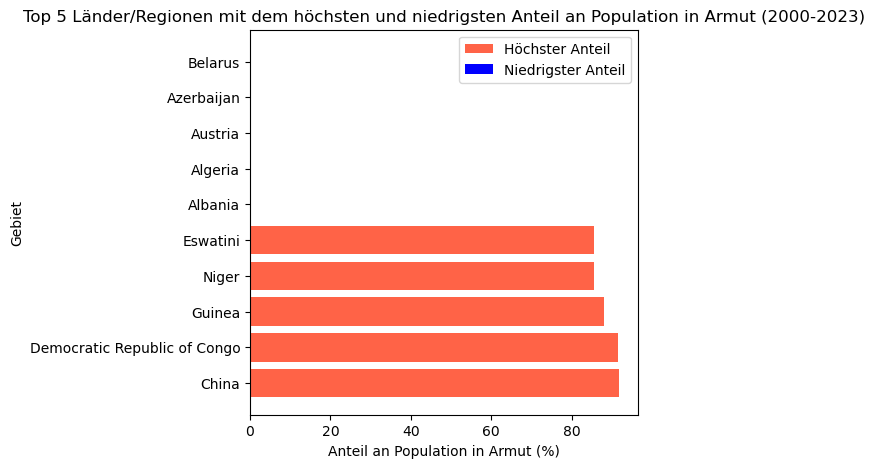

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

plt.barh(top_5_hoechster_anteil.index, top_5_hoechster_anteil, color='tomato', label='Höchster Anteil')

plt.barh(top_5_niedrigster_anteil.index, top_5_niedrigster_anteil, color='blue', label='Niedrigster Anteil')

plt.xlabel('Anteil an Population in Armut (%)')
plt.ylabel('Gebiet')
plt.title('Top 5 Länder/Regionen mit dem höchsten und niedrigsten Anteil an Population in Armut (2000-2023)')
plt.legend()

plt.show()